# Корреляция

Посмотрим, как считать коэффициенты корреляции в Python

In [61]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

import warnings 
warnings.simplefilter("ignore")

In [2]:
np.random.seed(123)

***
В файле pressure.xls приводятся для 15 пациентов данные о систолическом и диастолическом давлении крови непосредственно до принятия и спустя 2 часа после принятия 25 мг каптоприла. 
  
Имеется ли связь между снижением систолического и диастолического давления? Вычислите все изученные коэфиициенты корреляции и проверьте их значимость. Есть ли среди данных выбросы? 

In [4]:
data = pd.read_excel('pressure.xls')

In [5]:
data.head()

,СистДо,СистПосл,ДиасДо,ДиасПосл
0,210,201,130,125
1,169,165,122,121
2,187,166,124,121
3,160,157,104,106
4,167,174,112,100


In [6]:
DP1 = data["СистДо"] - data["СистПосл"]
DP2 = data["ДиасДо"] - data["ДиасПосл"]

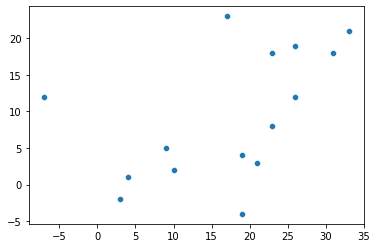

In [9]:
sns.scatterplot(x=DP1, y=DP2);

### Коэффициент корреляции Пирсона

In [10]:
stats.pearsonr(DP1, DP2)

(0.49504892295474656, 0.06062278606988294)

### Коэффициент корреляции Спирмена

In [11]:
stats.spearmanr(DP1, DP2)

SpearmanrResult(correlation=0.5560540352929466, pvalue=0.031360922746895184)

### Коэффициент корреляции Кендалла

In [ ]:
stats.kendalltau(DP1, DP2)

Давайте уберем одну точку, которая нам кажется выбросом и посмотрим, что случится с коэффициентами корреляции. У этой точки отрицательные изменения в DP1.

In [12]:
data_new = data[DP1 > 0]

DP1_new = data_new["СистДо"] - data_new["СистПосл"]
DP2_new = data_new["ДиасДо"] - data_new["ДиасПосл"]

Еще раз посмотрим на данные

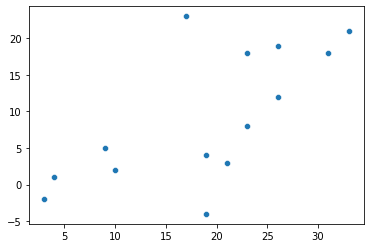

In [14]:
sns.scatterplot(x=DP1_new, y=DP2_new);

In [15]:
# коэффициент корреляции Пирсона
stats.pearsonr(DP1_new, DP2_new)

(0.6797987810762679, 0.0074792869569106826)

In [16]:
# коэффициент корреляции Спирмена
stats.spearmanr(DP1_new, DP2_new)

SpearmanrResult(correlation=0.6567344919942403, pvalue=0.01072757218087102)

In [17]:
# коэффициент корреляции Кендалла
stats.kendalltau(DP1_new, DP2_new)

KendalltauResult(correlation=0.550596554344981, pvalue=0.006963398309063252)

*В этой задаче мы делаем следующий: снижение систолического и диастолического давления положительно коррелированы. И эта корреляция значима. Кроме того, мы лишний раз убедились в том, что коэффициент корреляции Пирсона подвержен сильному влиянию выбросов.*

***
В файле lifeline.xls содержатся 50 пар наблюдений из исследования докторов Л. Матера и М. Уилсона. В нем рассматривались следующие переменные: X - длина "линии жизни" на левой руке в сантиметрах (с точностью до 0.15 см) и Y - продолжительность жизни человека (округленная до ближайшего целого года). Изучите корреляцию X и Y. Верно ли, что X и Y связаны линейной регрессионной зависимостью?

In [18]:
data = pd.read_excel('lifeline.xls')
data.head()

,X,Y
0,9.75,19
1,9.00,40
2,9.60,42
3,9.75,42
4,11.25,47


Построим диаграмму рассеяния и попробуем визуально оценить зависимость между X и Y.

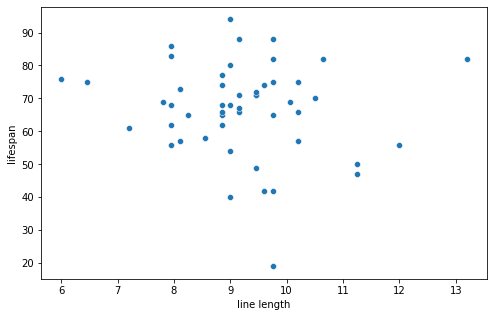

In [22]:
_, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x='X', y='Y', data=data, ax=ax)
ax.set_xlabel('line length')
ax.set_ylabel('lifespan');

Визуально кажется, что, скорее всего, никакой линейной зависимости нет. Выделяется несколько точек, которые несколько отстоят от основного облака, но видно, что их удаление принципиально картину не поменяет.

In [23]:
# рассмотрим критерий Пирсона
stats.pearsonr(data.X, data.Y)

(-0.12255365085952202, 0.3965106928959566)

Видно, что даже на уровне ошибки в 30% критерий Пирсона не отвергает гипотезу о том, что между длиной "линии жизни" и продолжительность жизни нет никакой линейной зависимости.

In [24]:
# рассмотрим критерий Спирмена
stats.spearmanr(data.X, data.Y)

SpearmanrResult(correlation=-0.08601349137019551, pvalue=0.5525613938198386)

Видно, что даже на уровне ошибки в 50% критерий Спирмена не отвергает гипотезу о том, что между длиной "линии жизни" и продолжительность жизни нет никакой линейной зависимости.

In [25]:
# рассмотрим критерий Кенделла
stats.kendalltau(data.X, data.Y)

KendalltauResult(correlation=-0.044979908444122044, pvalue=0.6559222232961208)

Видно, что даже на уровне ошибки в 60% критерий Кенделла не отвергает гипотезу о том, что между длиной "линии жизни" и продолжительность жизни нет никакой линейной зависимости.

*Все три критерия "уверенно" не стали отвергать гипотезу об отсутствии линейной зависимости между длиной "линии жизни" и продолжительностью жизни. На диаграмме рассеяния также нет никакой явной зависимости. С достаточно высокой уверенностью можно согласиться с результатами работы критериев.*

# Линейная регрессия

Давайте посмотрим, как строить линейную регрессию и анализировать ее качество.

In [26]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

В файле beauty.csv содержаться следующие данные о $n=1260$ опрошенных: 

- `wage` — заработная плата (долларов в час);
- `exper` —  опыт работы (лет);
- `union` — членство в профсоюзе (да/нет);
- `goodhlth` — состояние здоровья (хорошее/плохое);
- `black` — цвет кожи (белый/чёрный);
- `female` — пол (женский/мужской);
- `married` — семейное положение (в браке/не в браке);
- `service` — занятость в сфере обслуживания (да/нет);
- `educ` — образование (лет);
- `looks` — внешняя привлекательность (в баллах от 1 до 5).
  

Требуется оценить влияние внешней привлекательности на уровень заработной планы с учётом всех остальных факторов.

In [28]:
data = pd.read_csv("beauty.csv", sep=";", index_col=False) 

In [29]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


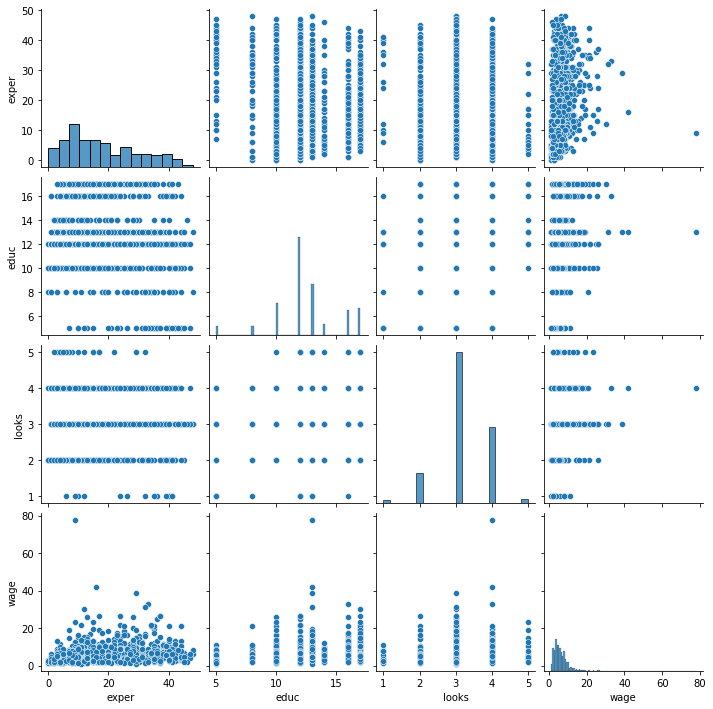

In [40]:
# для количественных признаков выведем матрицу диаграмм рассеяния
sns.pairplot(data=data[['exper', 'educ', 'looks', 'wage']]);

In [33]:
# а для бинарных признаков просто оценим сбалансированность
print(data.union.value_counts())
print(data.goodhlth.value_counts())
print(data.black.value_counts())
print(data.female.value_counts())
print(data.married.value_counts())
print(data.service.value_counts())

0    917
1    343
Name: union, dtype: int64
1    1176
0      84
Name: goodhlth, dtype: int64
0    1167
1      93
Name: black, dtype: int64
0    824
1    436
Name: female, dtype: int64
1    871
0    389
Name: married, dtype: int64
0    915
1    345
Name: service, dtype: int64


Еще раз посмотрим на целевой признак — уровень заработной платы. 

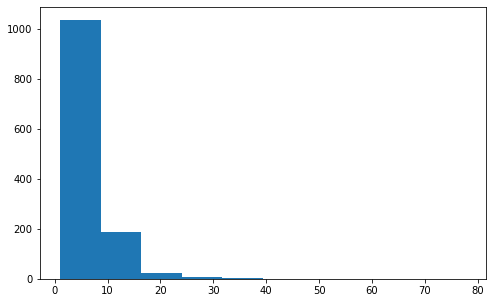

In [48]:
data['wage'].hist(figsize=(8,5), grid=False);

Один человек в выборке получает больше 70\\$ в час, остальные — меньше 50\\$ в час. Это очевидный выброс. Такое наблюдение лучше удалить из выборки, так как иначе регрессия "подстроится" под это наблюдение и будет хуже работать на "типичных" данных. 

In [49]:
data = data[data['wage'] < 70]

Посмотрим еще на признак, которых характеризует привлекательность опрошенных. 

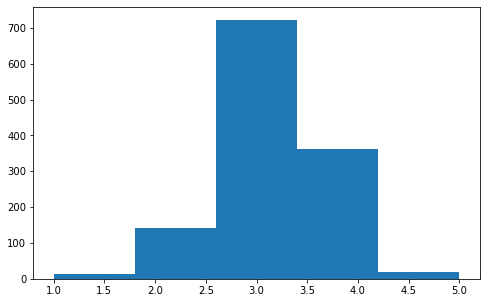

In [50]:
data['looks'].hist(figsize=(8,5), grid=False, bins=5);

In [51]:
data['looks'].value_counts()

3    722
4    363
2    142
5     19
1     13
Name: looks, dtype: int64

Видим, что незначительная часть опрошенных получили 1 или 5 баллов за привлекательность. И при этом много опрошенных оказались "средне" привлекательными — получили 3 балла. Так как нам нужно понять, влияет ли привлекательность на уровень заработной платы, заменим признак looks на два бинарных: привлекательность ниже среднего (1 или 2 балла) и привлекательность выше среднего (4 или 5 баллов).

In [52]:
data['belowavg'] = data['looks'].apply(lambda x: 1 if x < 3 else 0)
data['aboveavg'] = data['looks'].apply(lambda x: 1 if x > 3 else 0)
data.drop('looks', axis=1, inplace=True)

### Построение и анализ регрессии

In [53]:
model = smf.ols('wage ~ exper + union + goodhlth + black + \
                female + married + service + educ + belowavg + aboveavg', data=data).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     44.31
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.42e-75
Time:                        18:07:18   Log-Likelihood:                -3402.9
No. Observations:                1259   AIC:                             6828.
Df Residuals:                    1248   BIC:                             6884.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5898      0.743     -0.793      0.428      -2.048       0.869
exper          0.0850      0.009      9.118      0.000       0.067       0.103
union          0.4786      0.234      2.048      0.041       0.020       0.937
goodhlth      -0.0444      0.417     -0.107      0.915      -0.862       0.773
black         -0.6748      0.403     -1.674      0.094      -1.466       0.116
female        -2.3058      0.242     -9.522      0.000      -2.781      -1.831
married        0.4569      0.240      1.905      0.057      -0.014       0.927
service       -0.7303      0.252     -2.896      0.004      -1.225      -0.236
educ           0.4820      0.043     11.272      0.000       0.398       0.566
belowavg      -0.8185      0.323     -2.532      0.011      -1.453      -0.184
aboveavg      -0.0729      0.234     -0.311      0.756      -0.532       0.387
==============================================================================
Omnibus:                      898.031   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17969.693
Skew:                           3.076   Prob(JB):                         0.00
Kurtosis:                      20.456   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Перед тем, как интерпретировать полученные результаты, посмотрим на распределение остатков и визуально сравним его с нормальным.

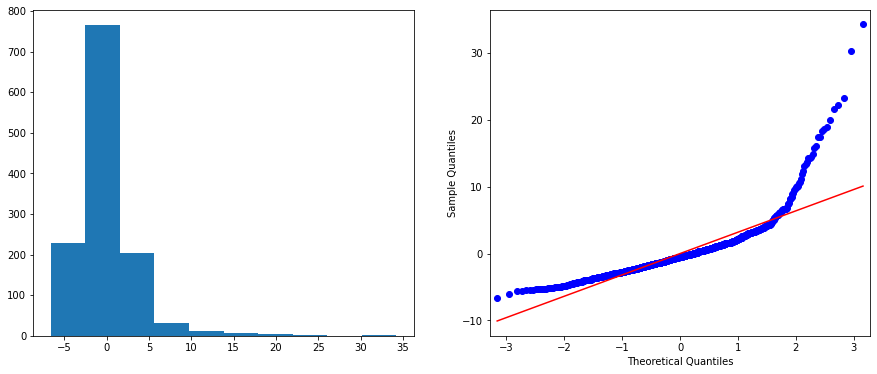

In [62]:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6)) 

model.resid.hist(ax=ax1, grid=False)
qqplot(model.resid, line='r',ax=ax2);

Распределение остатков имеет тяжелый правый хвост (как, кстати, и распределение заработной платы — нашего отклика). 

### Преобразование признаков

В ситуациях, когда признаки имеют тяжелые хвосты или обладают какими-то другими нежелательными свойствами, часто помогают различные преобразования этих признаков. Давайте, в качестве примера, перейдем от регрессии исходного отклика к регрессии его логарифма.

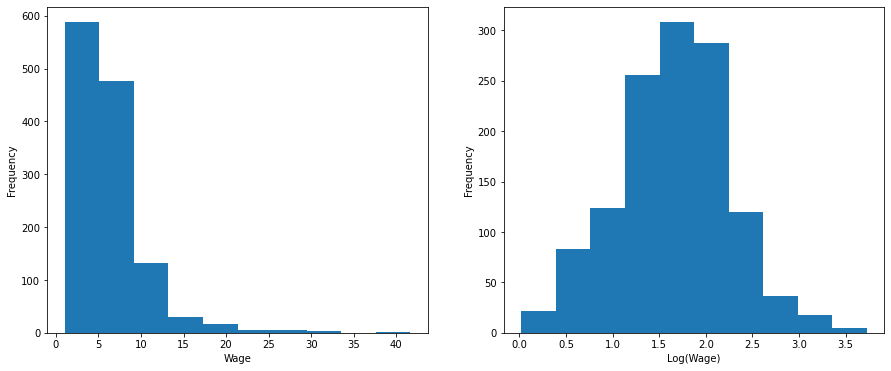

In [63]:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6)) 

data['wage'].plot.hist(ax=ax1, grid=False)
ax1.set_xlabel("Wage")

np.log(data['wage']).plot.hist(ax=ax2, grid=False)
ax2.set_xlabel("Log(Wage)");

In [64]:
model = smf.ols('np.log(wage) ~ exper + union + goodhlth + \
                black + female + married + service + educ + belowavg + aboveavg', data=data).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     77.63
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          1.18e-123
Time:                        22:17:52   Log-Likelihood:                -816.90
No. Observations:                1259   AIC:                             1656.
Df Residuals:                    1248   BIC:                             1712.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4515      0.095      4.737      0.000       0.265       0.639
exper          0.0138      0.001     11.546      0.000       0.011       0.016
union          0.1785      0.030      5.957      0.000       0.120       0.237
goodhlth       0.0785      0.053      1.470      0.142      -0.026       0.183
black         -0.0989      0.052     -1.913      0.056      -0.200       0.003
female        -0.3938      0.031    -12.684      0.000      -0.455      -0.333
married        0.0425      0.031      1.383      0.167      -0.018       0.103
service       -0.1505      0.032     -4.656      0.000      -0.214      -0.087
educ           0.0799      0.005     14.581      0.000       0.069       0.091
belowavg      -0.1305      0.041     -3.148      0.002      -0.212      -0.049
aboveavg      -0.0041      0.030     -0.138      0.890      -0.063       0.055
==============================================================================
Omnibus:                       27.318   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.550
Skew:                           0.159   Prob(JB):                     7.80e-11
Kurtosis:                       3.887   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Снова посмотрим на остатки.

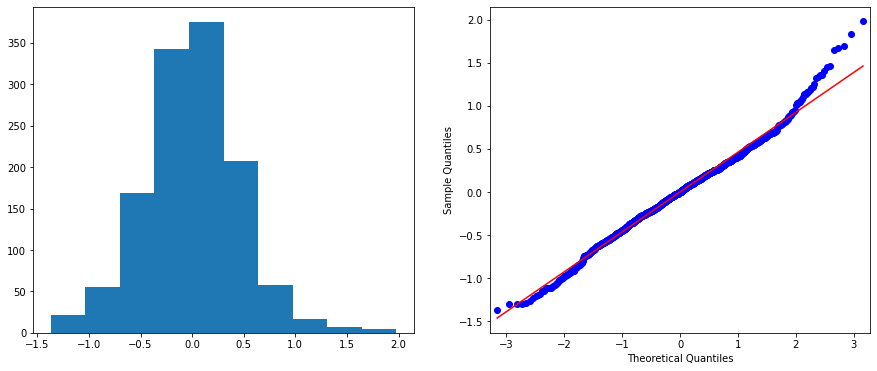

In [66]:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6)) 

model.resid.hist(ax=ax1, grid=False)
qqplot(model.resid, line='r', ax=ax2);

Ситуация с остатками стала значительно лучше: коэффициент детерминации увеличился, а распределение остатков стало больше напоминать нормальное. Посмотрим на зависимость остатков от непрерывных признаков.

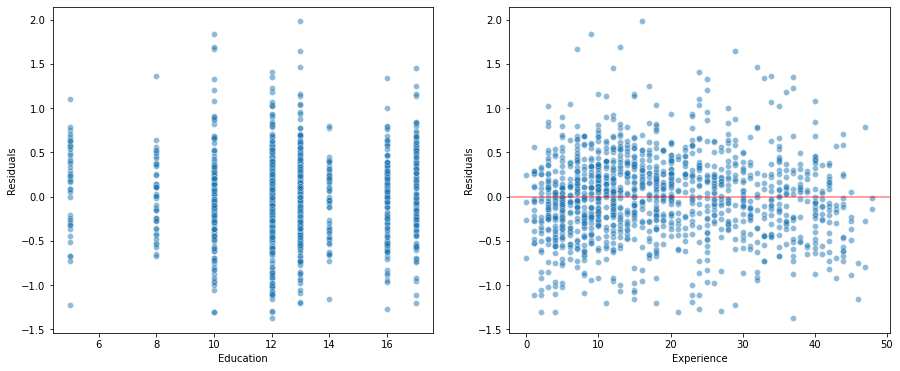

In [74]:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6)) 

sns.scatterplot(x=data['educ'], y=model.resid, ax=ax1, alpha=0.5)
ax1.set_xlabel('Education')
ax1.set_ylabel('Residuals')

sns.scatterplot(x=data['exper'], y=model.resid, ax=ax2, alpha=0.5)
plt.axhline(0, color='r', alpha=0.5)
ax2.set_xlabel('Experience')
ax2.set_ylabel('Residuals');

По второму графику может показаться, что остатки расположены несимметрично относительно нуля. Так может произойти, например, если зависимость отклика от отпыта работы не является линейной. Посмотрим на эту зависимость повнимательнее.

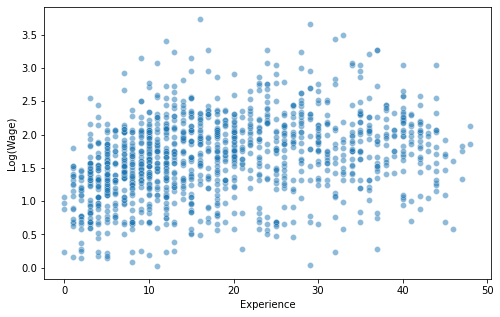

In [76]:
plt.figure(figsize=(8,5))

sns.scatterplot(x=data['exper'], y=np.log(data['wage']), alpha=0.5)
plt.xlabel('Experience')
plt.ylabel('Log(Wage)');

Действительно, эта зависимость не похожа на линейную. Мы видим, что сначала значения отклика увеличиваются при увеличении опыта работы, но затем увеличение опыта работы перестает влиять на отклик. Может показаться, что зависимость больше напоминает квадратный корень или параболу (малой кривизны). Попробуем добавить к признакам квадратный корень опыта работы, чтобы учесть этот эффект.

### Добавление новых признаков

In [89]:
model3 = smf.ols('np.log(wage) ~ exper + np.sqrt(exper) + union + \
                goodhlth + black + female + married + service + educ + belowavg + aboveavg', data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     76.33
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          4.83e-131
Time:                        23:48:13   Log-Likelihood:                -797.28
No. Observations:                1259   AIC:                             1619.
Df Residuals:                    1247   BIC:                             1680.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0091      0.117      0.078      0.938      -0.221       0.239
exper             -0.0219      0.006     -3.770      0.000      -0.033      -0.010
np.sqrt(exper)     0.2976      0.047      6.282      0.000       0.205       0.391
union              0.1723      0.030      5.833      0.000       0.114       0.230
goodhlth           0.0695      0.053      1.321      0.187      -0.034       0.173
black             -0.0827      0.051     -1.622      0.105      -0.183       0.017
female            -0.3954      0.031    -12.928      0.000      -0.455      -0.335
married            0.0032      0.031      0.103      0.918      -0.058       0.064
service           -0.1591      0.032     -4.994      0.000      -0.222      -0.097
educ               0.0750      0.005     13.747      0.000       0.064       0.086
belowavg          -0.1276      0.041     -3.126      0.002      -0.208      -0.048
aboveavg          -0.0046      0.030     -0.155      0.877      -0.063       0.053
==============================================================================
Omnibus:                       29.314   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.842
Skew:                           0.152   Prob(JB):                     3.35e-12
Kurtosis:                       3.957   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Посмотрим на остатки и зависимость остатков от непрерывных признаков.

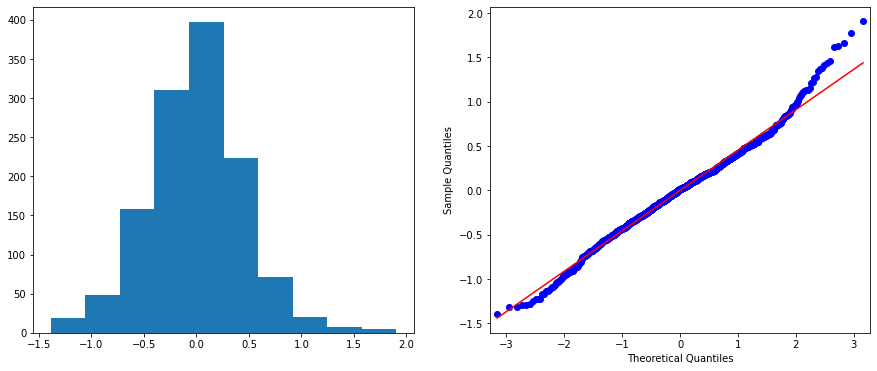

In [79]:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6)) 

model3.resid.hist(ax=ax1, grid=False)
qqplot(model3.resid, line='r', ax=ax2);

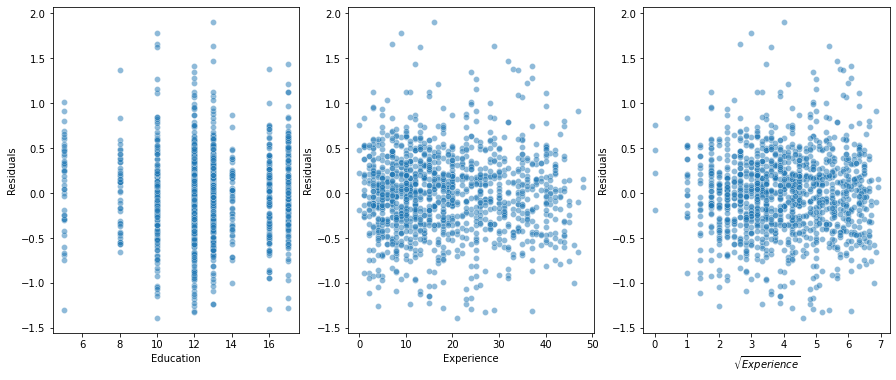

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 6)) 

sns.scatterplot(data['educ'], model3.resid, ax=ax1, alpha=0.5)
ax1.set_xlabel('Education')
ax1.set_ylabel('Residuals')

sns.scatterplot(data['exper'], model3.resid, ax=ax2, alpha=0.5)
ax2.set_xlabel('Experience')
ax2.set_ylabel('Residuals')

sns.scatterplot(np.sqrt(data['exper']), model3.resid, ax=ax3, alpha=0.5)
ax3.set_xlabel('$\sqrt{Experience}$')
ax3.set_ylabel('Residuals');

Заметим, что после добавления нового признака — квадратного корня из опыта работы — ситуация улучшилась: распределение остатков стало более гомоскедастичным и симметричным относительно нуля. Хоть и коэффициент детерминации $R^2$ сильно не изменился, оставим этот признак в нашей модели, так как симметричность и гомоскедастичность ошибок улучшит точность доверительных интервалов для коэффициентов регрессии и проверку гипотез о их значениях (доверительные интервалы и критерии строятся в предположении о нормальности ошибок).

### Удаление ненужных признаков

В модели есть признаки, которые слабо влияют на отклик: состояние здоровья, цвет кожи, семейное положение и Intercept (столбец единиц). Удалим их. Признак aboveavg (привлекательность выше среднего) тоже незначим, но удалять его не будем, так как в данной задаче нам нужно исследовать его влияние на отклик.

In [86]:
model4 = smf.ols('np.log(wage) ~ exper + np.sqrt(exper) + union + female + \
                        service + educ + belowavg + aboveavg -1', data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           np.log(wage)   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              2162.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):                        0.00
Time:                        23:47:40   Log-Likelihood:                         -799.63
No. Observations:                1259   AIC:                                      1615.
Df Residuals:                    1251   BIC:                                      1656.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
exper             -0.0244      0.005     -5.407      0.000      -0.033      -0.016
np.sqrt(exper)     0.3185      0.033      9.539      0.000       0.253       0.384
union              0.1719      0.029      5.851      0.000       0.114       0.230
female            -0.4013      0.028    -14.085      0.000      -0.457      -0.345
service           -0.1616      0.031     -5.168      0.000      -0.223      -0.100
educ               0.0777      0.005     17.155      0.000       0.069       0.087
belowavg          -0.1210      0.040     -2.989      0.003      -0.200      -0.042
aboveavg          -0.0021      0.029     -0.071      0.943      -0.060       0.056
==============================================================================
Omnibus:                       26.446   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.447
Skew:                           0.137   Prob(JB):                     8.21e-11
Kurtosis:                       3.900   Cond. No.                         80.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

После удаления четырех признаков коэффициент детерминации $R^2$ значимо изменился, теперь его значение равно 0.933. Но это ничего не значит, так как без признака `Intercept` он считается по [другой формуле]( https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.rsquared.html#statsmodels.regression.linear_model.RegressionResults.rsquared)

In [87]:
1 - model4.ssr / model4.uncentered_tss, 1 - model4.ssr / model4.centered_tss

(0.9325580236779081, 0.4001663906189967)

Тем не менее, коэффициент $R^2$, посчитанный по предыдущей формуле, почти не изменился. Это означает, что модель несильно пострадала от удаления признаков.

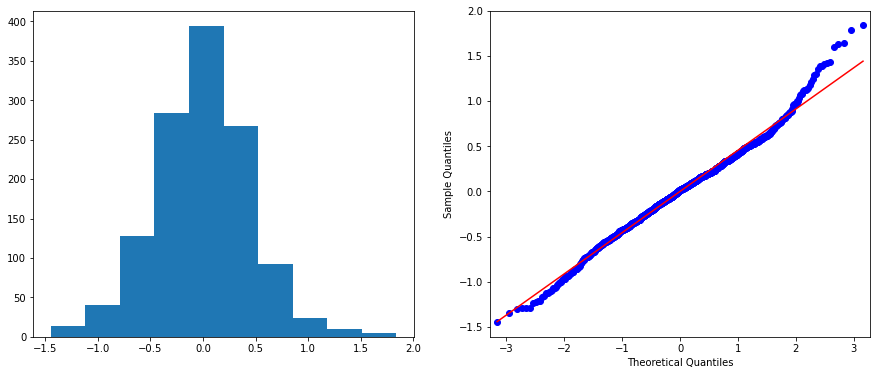

In [88]:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6)) 

model4.resid.hist(ax=ax1, grid=False)
qqplot(model4.resid, line='r', ax=ax2);

### Критерий Фишера

Посмотрим с помощью критерия Фишера, не стала ли модель хуже после удаления четырех признаков.

In [90]:
# первый способ
print("F=%f, pvalue=%f, k1=%f" % model3.compare_f_test(model4))

F=1.165753, pvalue=0.324216, k1=4.000000


In [92]:
# второй способ способ
print(model3.f_test("Intercept = goodhlth = black = married = 0"))

<F test: F=array([[1.1657531]]), p=0.32421644874567207, df_denom=1.25e+03, df_num=4>


Видим, что гипотеза `Intercept = goodhlth = black = married = 0` не отвергается, что окончательно убеждает нас в том, что модель `model4` лучше, чем `model3`. (Конечно, этот критерий тоже требует нормальность ошибок, которой у нас нет, тем не менее мы пользуемся принципом: "идеальные условия никогда не выполняются, но модели, которые мы строим и которые требуют выполнения этих идеальных условий, часто бывают полезными".)

### Еще одна визуальная проверка

Еще один способ визуально проверить регрессионную модель, является следующий график. На нем отображена зависимость "влиятельности" каждого наблюдения от квадрата соответствующего остатка (квадрата ошибки предсказания модели). Подробнее о том, как считается "влиятельность" можно посмотреть здесь: https://en.wikipedia.org/wiki/Leverage_(statistics)

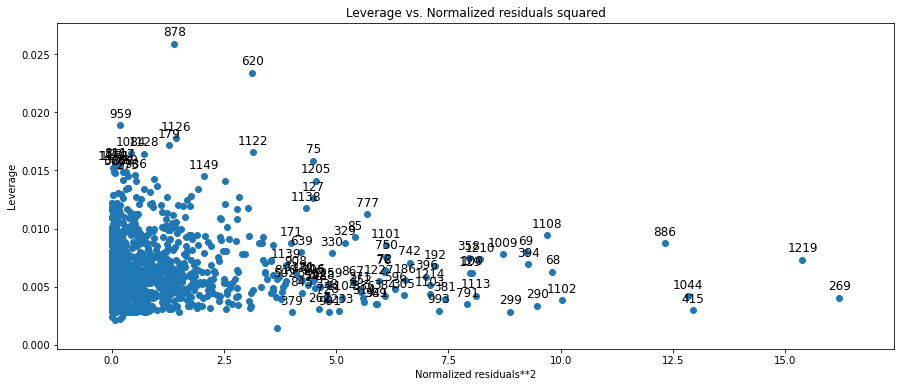

In [97]:
_, ax = plt.subplots(figsize=(15,6))
plot_leverage_resid2(model4, ax=ax);

В целом, на этом графике все хорошо — мы не видим очевидных выбросов. Можно, конечно, попытаться удалить точки, на которых наша модель сильно ошибается (примеры выше), но не совсем очевидно, поэтому это сделает нашу модель лучше.

Итоговая модель достаточно хороша, она объясняет примерно 40\% вариации отклика — логарифма заработной платы. 
Она выглядит следующим образом: 

$$
\log(\text{wage}) \approx 
-0.0244 \cdot \text{exper} + 0.3185  \cdot \sqrt{\text{exper}}
+0.1719 \cdot \text{union} -0.4013 \cdot \text{female}
-0.1616 \cdot \text{service} +0.0777 \cdot \text{educ}\\
-0.1210 \cdot \text{belowavg}  -0.0021 \cdot \text{aboveavg}
$$
  
Это можно записать в следующем виде: 

$$
\text{wage} \approx  e^{-0.0244 \text{exper}} \cdot e^{0.3185 \sqrt{\text{exper}}}
\cdot e^{+0.1719 \text{union}} \cdot e^{-0.4013 \text{female}}
\cdot e^{-0.1616 \text{service}} \cdot e^{+0.0777 \text{educ}}
\cdot e^{-0.1210 \text{belowavg}} \cdot e^{ -0.0021\text{aboveavg}}
$$


При интересующих нас признаках привлекательности стоят коэффициенты: -0.1210 (при belowavg) и -0.0021 (при aboveavg). Поскольку регрессия делалась на логарифм заработной платы, интерпретировать их можно как прирост в процентах ($e^{\beta} \approx 1 + \beta$). То есть представители генеральной совокупности, из которой взята выборка, получают в среднем:

- на 12% меньше, если их привлекательность ниже среднего;
- столько же, если их привлекательность выше среднего.

***
В файле auto.csv находятся данные, которые описывают характеристики 392 автомобилей. Какие признаки влияют на расход топлива? Постройте линейную регрессионную модель для предсказания расхода топлива по этим признакам. Интерпретируйте значение коэффициентов регрессии.

In [98]:
auto = pd.read_csv('auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Кажется, что признак "название автомобиля" (name) не поможет нам при решении задачи построения линейной регрессии 

In [99]:
auto['name'].unique().shape

(301,)

Три четверти названий машин уникальные (301 из 392), уберем эту колонку из датасета.

In [100]:
auto.drop('name', axis='columns', inplace=True)

Признак "страна происхождения" (origin) содержит категориальные переменные, закодированные цифрами 1 (Америка), 2 (Европа), 3 (Япония). Рассматривать их как количественные было бы некорректно, поэтому применим к ним one-hot кодирование.

Убедимся, что признак `origin` более-менее сбалансирован.

In [113]:
auto['origin'].value_counts(normalize=True)

1    0.625000
3    0.201531
2    0.173469
Name: origin, dtype: float64

In [107]:
pd.get_dummies(auto['origin']).rename(columns={1:'America', 2:'Europe', 3:'Japan'})

,America,Europe,Japan
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
387,1,0,0
388,0,1,0
389,1,0,0
390,1,0,0


In [115]:
auto = pd.concat([auto.drop('origin', axis='columns'), 
                  pd.get_dummies(auto['origin']).rename(columns={
                      1:'America',
                      2:'Europe',
                      3:'Japan'})], axis='columns')

In [116]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,America,Europe,Japan
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


Построим матрицу диаграмм рассеяния для количественных признаков.

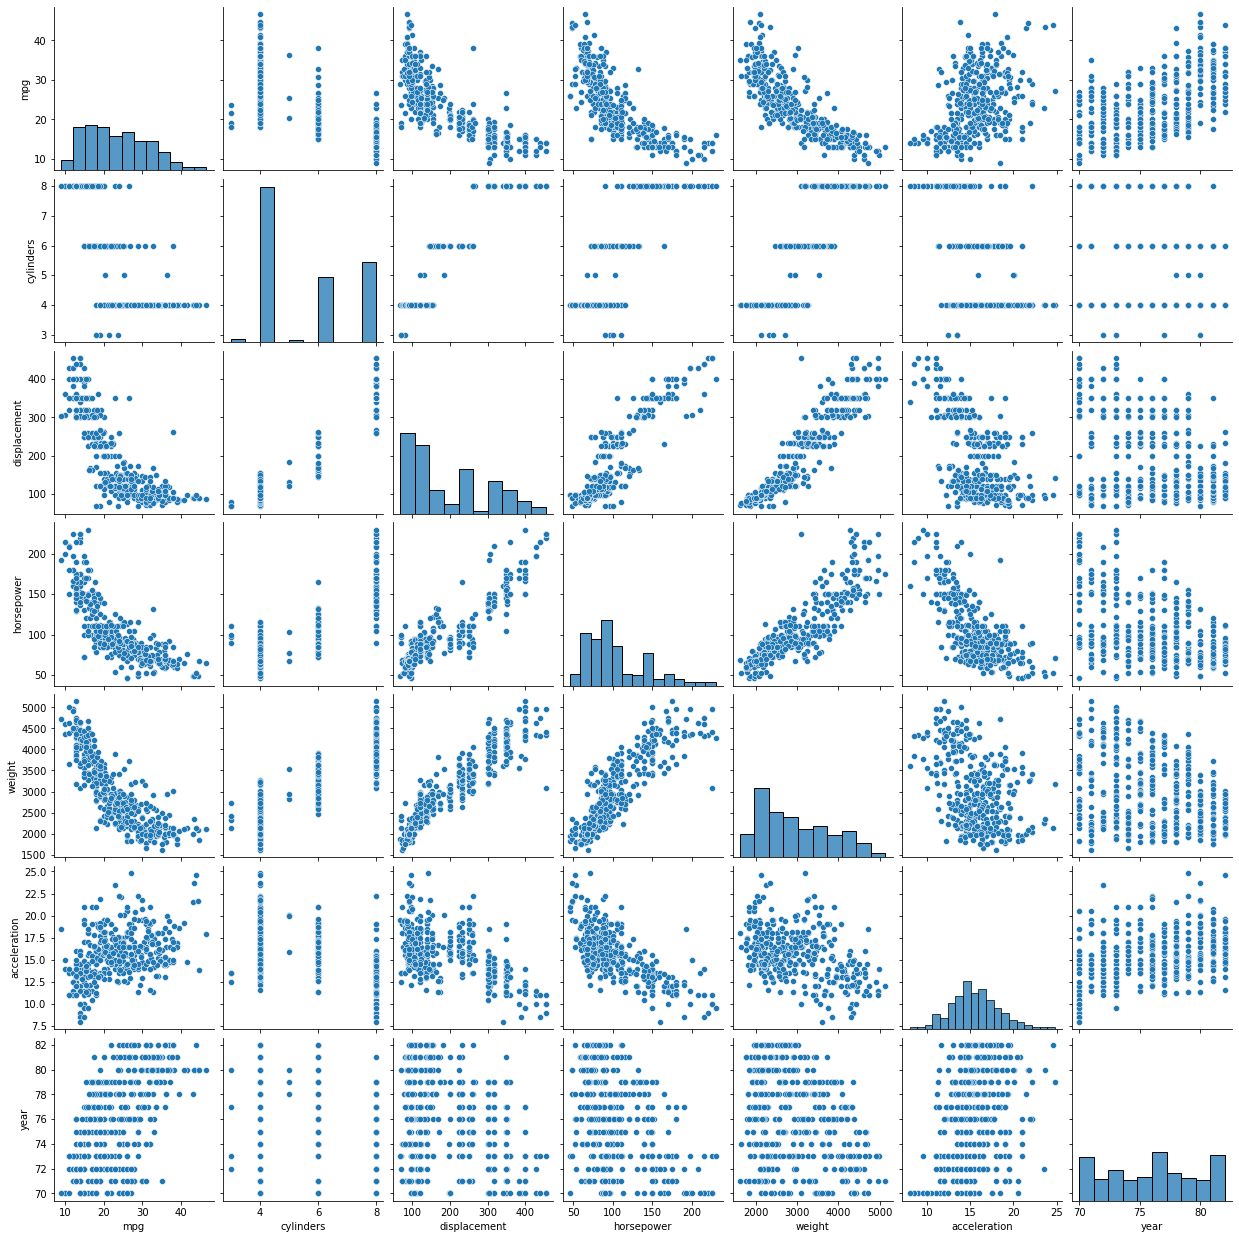

In [117]:
sns.pairplot(data=auto.iloc[:, :-3]);

Видно, что наш отклик "расход топлива" (mpg) скорее всего зависит нелинейно от "объем мотора" (displacement), "мощность мотора" (horsepower), "вес" (weight), "время разгона" (acceleration). Распределение mpg также сильно отличается от нормального. Но сначала попробуем построить обычную линейную регрессию без учета этих соображений и посмотрим, что из этого получится.

Cначала посмотрим внимательнее на распределение нашего отклика mpg.

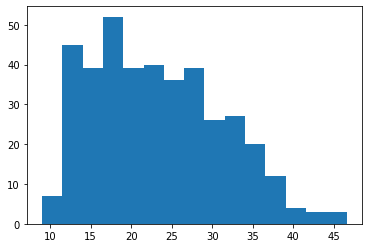

In [118]:
auto['mpg'].hist(bins=15, grid=False);

Очевидных выбросов нет, будем строить регрессию. Поскольку любой из столбцов America, Europe, Japan можно представить как линейную комбинацию двух других, то исключим один из этих столбцов из модели; ислючим Europe, так как автомобилей из Европы в датасете меньше всего.

In [119]:
model = smf.ols('mpg ~ cylinders + displacement + horsepower + \
                 weight + acceleration + year + America + Japan', data=auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          1.79e-139
Time:                        15:15:28   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.3246      4.602     -3.330      0.001     -24.374      -6.276
cylinders       -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement     0.0240      0.008      3.133      0.002       0.009       0.039
horsepower      -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight          -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration     0.0791      0.098      0.805      0.421      -0.114       0.272
year             0.7770      0.052     15.005      0.000       0.675       0.879
America         -2.6300      0.566     -4.643      0.000      -3.744      -1.516
Japan            0.2232      0.566      0.394      0.694      -0.890       1.336
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Мы столкнулись с проблемой мультиколлинеарности признаков, то есть какие-то признаки в нашей выборке почти линейно зависят друг друга. Действительно, если посмотреть на датасет, то можно заметить, что такие признаки как "мощность мотора" (horsepower), "количество цилиндров" (cylinders), "объем мотора" (displacemnet), "время разгона до 60 м/ч" (acceleration) так или иначе характерезуют мощность автомобиля. Параметр "масса автомобиля" (weight) тоже может быть связан с параметрами "мощность мотора" и "объем мотора".

Если посмотреть на нашу матрицу диаграмм рассеяния, то можно увидеть, что почти между всеми перечисленными выше признаками есть некоторая взаимосвязь. Более того, видно, что и параметр "год выпуска" (year) также связан, например, с параметрами "масса автомобиля", "объем мотора", "мощность мотора".

Попробуем исключить некоторые параметры из рассмотрения, чтобы решить проблему мультиколлинеарности. У нас признаков только 8, а сам датасет включает относительно немного откликов (а значит, модель обучается быстро), так что можно просто перебрать разные варианты вручную.

In [120]:
model2 = smf.ols('mpg ~ horsepower + cylinders + America + Japan', data=auto).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     209.8
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           1.62e-95
Time:                        15:18:11   Log-Likelihood:                -1135.2
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     387   BIC:                             2300.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6205      0.870     46.679      0.000      38.910      42.331
horsepower    -0.0892      0.011     -8.275      0.000      -0.110      -0.068
cylinders     -1.4007      0.268     -5.228      0.000      -1.927      -0.874
America       -1.1714      0.698     -1.677      0.094      -2.545       0.202
Japan          2.6984      0.729      3.701      0.000       1.265       4.132
==============================================================================
Omnibus:                       28.735   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.210
Skew:                           0.594   Prob(JB):                     1.37e-08
Kurtosis:                       3.899   Cond. No.                         511.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Перебрав несколько разных комбинаций признаков, получили следующий набор: horsepower, cylinders, America, Japan. Добавление любого другого признака в этот набор приводит к возникновению мультиколлинеарности. Замена какого-то из признаков на другой (кроме замены одной из стран на Europe) также ведет к мультиколлинеарности.

Как видно из summary гипотеза о том, что остатки модели имеют нормальное распределние отвергаются; все же оценим ситуацию визуально.

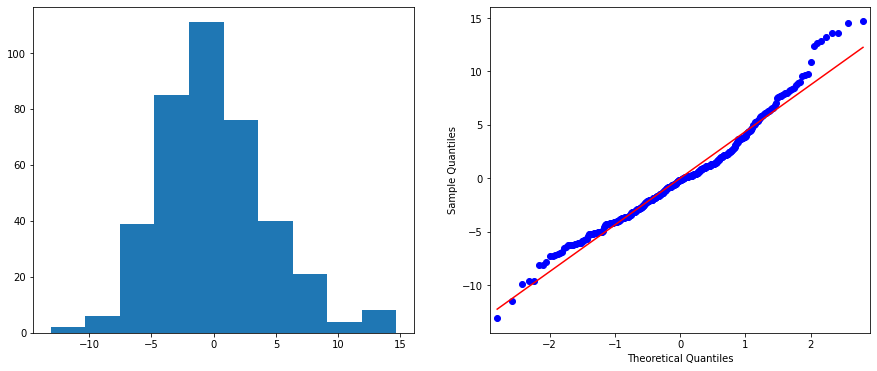

In [121]:
_, ax = plt.subplots(ncols=2, figsize=(15,6))
model2.resid.hist(ax=ax[0], grid=False)
qqplot(model2.resid, line='r', ax=ax[1]);

Видно, что остатки, как минимум, имеют тяжелый правый хвост. Попробуем взять логарифм от нашего отклика и построить линейную регрессию уже для него.

Посмотрим, как поменяется распределение отклика, если взять от него логарифм.

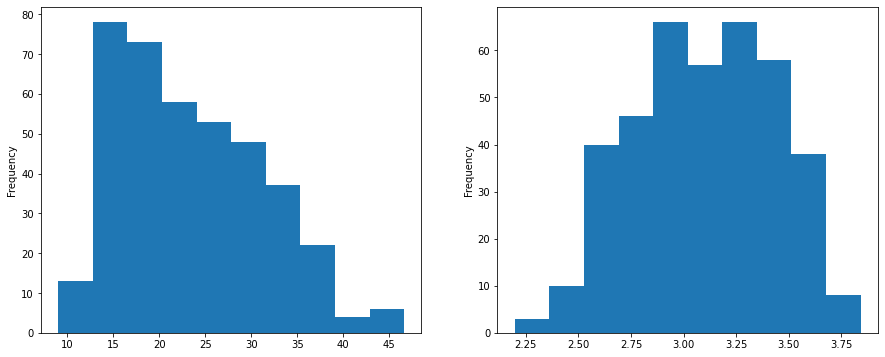

In [124]:
_, ax = plt.subplots(ncols=2, figsize=(15,6))
auto['mpg'].plot.hist(ax=ax[0], grid=False)
np.log(auto['mpg']).plot.hist(ax=ax[1], grid=False);

In [125]:
model3 = smf.ols('np.log(mpg) ~ horsepower + cylinders + America + Japan', data=auto).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     308.6
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          6.11e-119
Time:                        15:35:43   Log-Likelihood:                 147.90
No. Observations:                 392   AIC:                            -285.8
Df Residuals:                     387   BIC:                            -266.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9215      0.033    118.936      0.000       3.857       3.986
horsepower    -0.0042      0.000    -10.195      0.000      -0.005      -0.003
cylinders     -0.0709      0.010     -6.981      0.000      -0.091      -0.051
America       -0.0317      0.026     -1.197      0.232      -0.084       0.020
Japan          0.0970      0.028      3.512      0.000       0.043       0.151
==============================================================================
Omnibus:                        1.806   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.557
Skew:                           0.126   Prob(JB):                        0.459
Kurtosis:                       3.178   Cond. No.                         511.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Опять оценим остатки модели визуально.

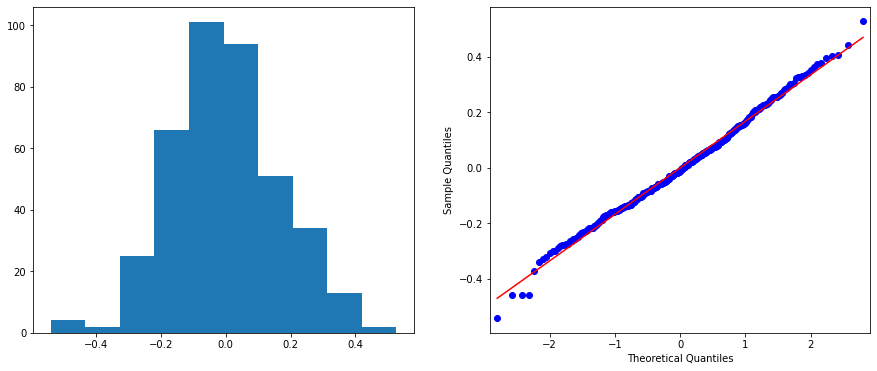

In [127]:
_, ax = plt.subplots(ncols=2, figsize=(15,6))
model3.resid.hist(ax=ax[0], grid=False)
qqplot(model3.resid, line='r', ax=ax[1]);

Кажется, что ситуация существенно улучшилась. Коэффициент детерминации вырос по сравнению с линейной регрессией `model2`, а AIC и BIC заметно уменьшились. Более того, критерии Omnibus и Jarque-Bera теперь не отвергают гипотезу о том, что остатки имеют нормальное распределение. Визуальна картина с остатками тоже стала лучше.

Посмотрим на зависимость остатков от количественных признаков:

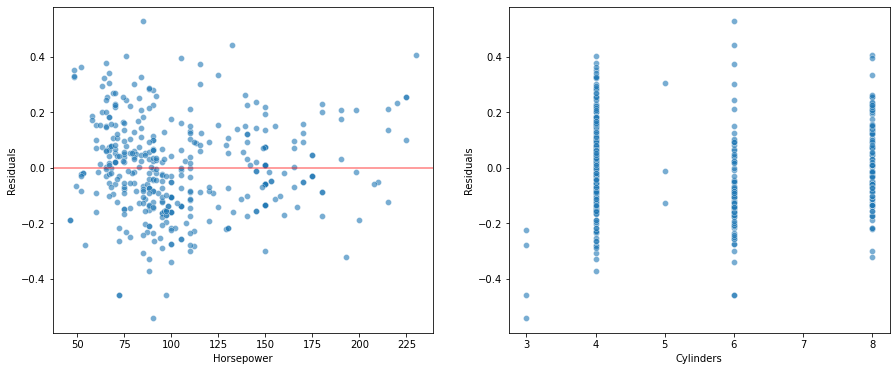

In [130]:
_, ax = plt.subplots(ncols=2, figsize=(15,6)) 

sns.scatterplot(auto['horsepower'], model3.resid, ax=ax[0], alpha=0.6)
ax[0].axhline(0, color='r', alpha=0.5)
ax[0].set_xlabel('Horsepower')
ax[0].set_ylabel('Residuals')

sns.scatterplot(auto['cylinders'], model3.resid, ax=ax[1], alpha=0.6)
ax[1].set_xlabel('Cylinders')
ax[1].set_ylabel('Residuals');

Кажется, что на обоих рисунках остатки распределены более-менее симметрично относительно нуля. Также кажется, что дисперсия остатков уменьшается при увеличении мощности мотора, но это может быть связано и с тем, что заметно большая часть наблюдений приходится на автомтобили с мощностью двигатетля до 125 лошадиных сил. Тем не менее, посмотрим еще и на распредление нашего отклика относительно этих двух признаков.

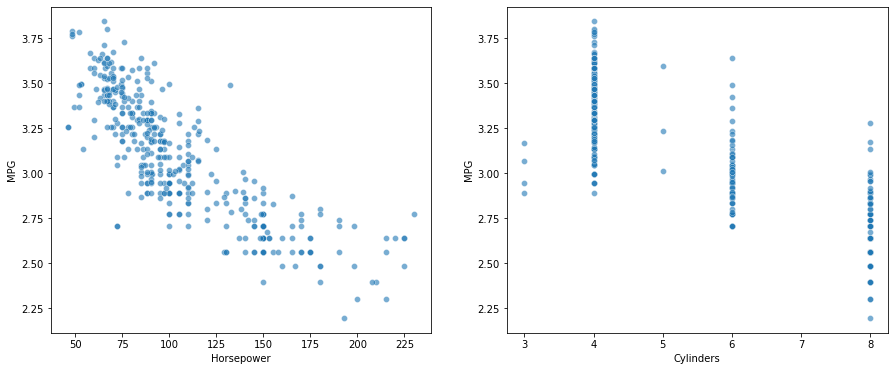

In [131]:
_, ax = plt.subplots(ncols=2, figsize=(15,6)) 

sns.scatterplot(auto['horsepower'], np.log(auto['mpg']), ax=ax[0], alpha=0.6)
ax[0].set_xlabel('Horsepower')
ax[0].set_ylabel('MPG')

sns.scatterplot(auto['cylinders'], np.log(auto['mpg']), ax=ax[1], alpha=0.6)
ax[1].set_xlabel('Cylinders')
ax[1].set_ylabel('MPG');

Кажется, что зависимость mpg от horsepower не совсем линейная, скорее похожа на какую-то гиперболу. Попробуем добавить в модель соответствующий признак.

Сначала посмотрим на зависимость $\text{mpg}$ от $1 / \text{horsepower}$

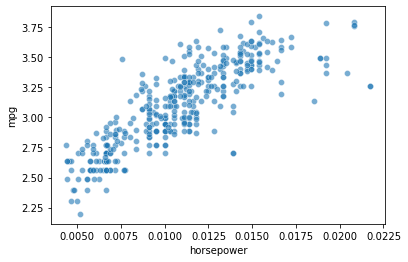

In [135]:
sns.scatterplot(1 / auto['horsepower'], np.log(auto['mpg']), alpha=.6);

Действиельно, кажется, что зависимость стала больше походить на линейную, однако попытки добавления в регрессию признака $\frac{1}{\text{horsepower}}$ (а также $\frac{1}{\sqrt{\text{horsepower}}}$ и $\frac{1}{\text{horsepower}^{2}}$) привели к возникновлению мультиколлинеарности, избавиться от которой получалось при удалении оригинального признака horsepower, поэтому было решено новых признаков не добавлять.

Из summary к регрессионной модели model3 видно, что критерий Стьюдента не отвергает гипотезу о том, что признак America явялется незначимым для модели. (Гипотезы о незначимости всех остальных признаков критерий Стьюдента отвергает). Поробуем исключить из модели признак America и посмотреть, что получится в результате.

In [136]:
model4 = smf.ols('np.log(mpg) ~ horsepower + cylinders + Japan', data=auto).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     410.5
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          5.67e-120
Time:                        15:55:04   Log-Likelihood:                 147.18
No. Observations:                 392   AIC:                            -286.4
Df Residuals:                     388   BIC:                            -270.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9185      0.033    119.116      0.000       3.854       3.983
horsepower    -0.0041      0.000    -10.145      0.000      -0.005      -0.003
cylinders     -0.0750      0.010     -7.866      0.000      -0.094      -0.056
Japan          0.1153      0.023      5.011      0.000       0.070       0.161
==============================================================================
Omnibus:                        2.243   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.998
Skew:                           0.131   Prob(JB):                        0.368
Kurtosis:                       3.231   Cond. No.                         477.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Мы видим, что коэффициент детерминации почти не изменился, `AIC` и `BIC` немного уменьшились, а критерии `Omnibus` и `Jarque-Bera` по-прежнему не отвергают гипотезу о нормальном распределении остатков модели. Тогда остановимся на текущем варианте модели.

Выполним еще одну визуальную проверку на наличие выбросов в наших наблюдениях.

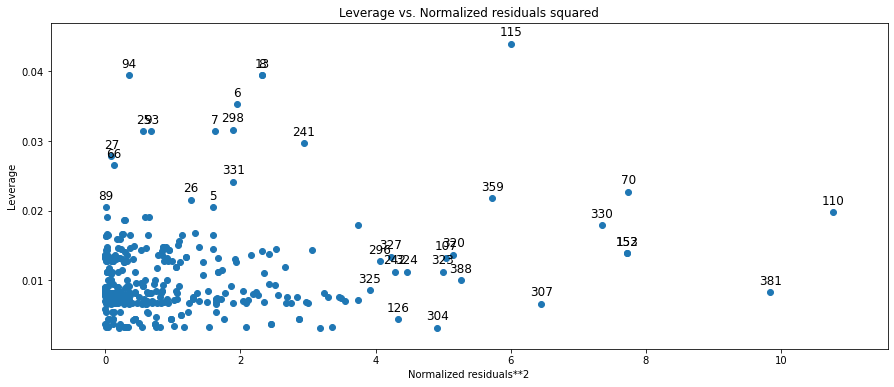

In [137]:
_, ax = plt.subplots(figsize=(15,6)) 
plot_leverage_resid2(model4, ax=ax);

Видно, что выделяются наблюдения 110 и 115, но они все же достаточно далеко отстоят от верхнего правого угла диаграммы (где должны находится наблюдения, на которых модель ошибается больше всего, и которые при этом обладают максимальным влияением на ее работу), так что можно считать, что явных выбросов, искажающих работу модели нет.

Получившаяся у нас финальная модель объясняет примерно 76% вариации отклика - логарифма расхода топлива (mpg) и выглядит следующим образом:
$$
\log(\text{mpg}) \approx 3.9185 \cdot 1 -0.0041 \cdot \text{horsepower} 
-0.0750 \cdot \text{cylinders} +0.1153 \cdot \text{Japan}
$$

Выразим зависимость mpg от использованных в модели признаков явно: 

$$
\text{mpg} \approx  e^{3.9185} \cdot e^{-0.0041 \text{horsepower}}
\cdot e^{-0.0750 \text{cylinders}} \cdot e^{0.1153 \text{Japan}}
$$
  
Проинтерпретируем влияение признаков на наш отклик.
На один галлон топлива машина проедет:
- на 0,4% миль меньше за каждую добавленную лошадиную силу;
- на 7,5% миль меньше за каждый добавленный цилиндр;
- на 11,5% миль больше, если была произведена в Японии.